# Imports

In [1]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
os.path.abspath(os.curdir)
os.chdir("..")
ML_FOLDER_PATH = os.path.abspath(os.curdir)
sys.path.append(ML_FOLDER_PATH)

In [2]:
import src.helpers as hlp
import gc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
tqdm.pandas()

[nltk_data] Downloading package words to /Users/jdidio/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Loading data

In [3]:
t_pos = pd.read_table("data/train_pos_full.txt", header=None, names=['tweet'], dtype=str,on_bad_lines='skip')
t_pos['label'] = 1
t_neg = pd.read_table("data/train_neg_full.txt", header=None, names=['tweet'], dtype=str,on_bad_lines='skip')
t_neg['label'] = -1
df = pd.concat((t_pos,t_neg), ignore_index=True)

# Wordcloud of words per label
## Before processing
Figure of the most appearing word in the dataset before preprocessing

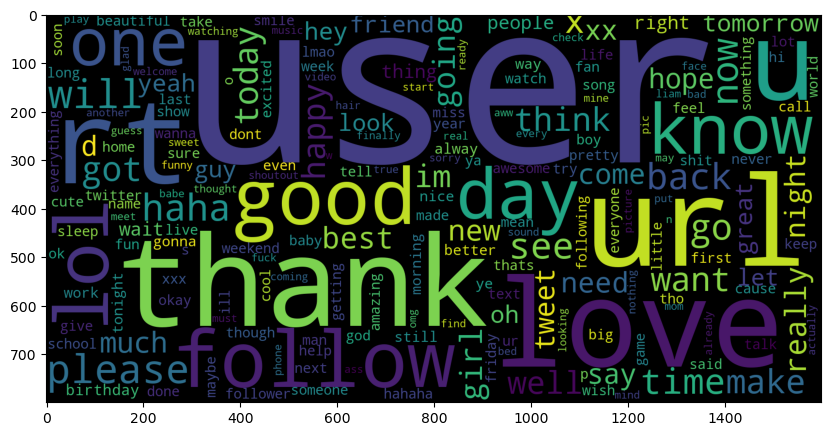

In [4]:
data_pos = df[df['label'] == 1]['tweet']
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 200 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

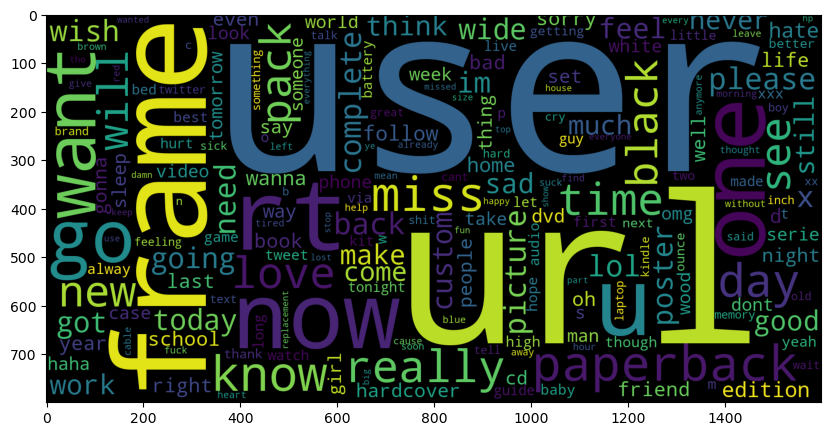

In [5]:
data_neg = df[df['label'] == -1]['tweet']
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 200 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

## After processing
Figure of the most appearing word in the dataset after preprocessing

In [6]:
df = hlp.preprocess_data(df)

100%|██████████| 2458295/2458295 [00:48<00:00, 50261.79it/s]


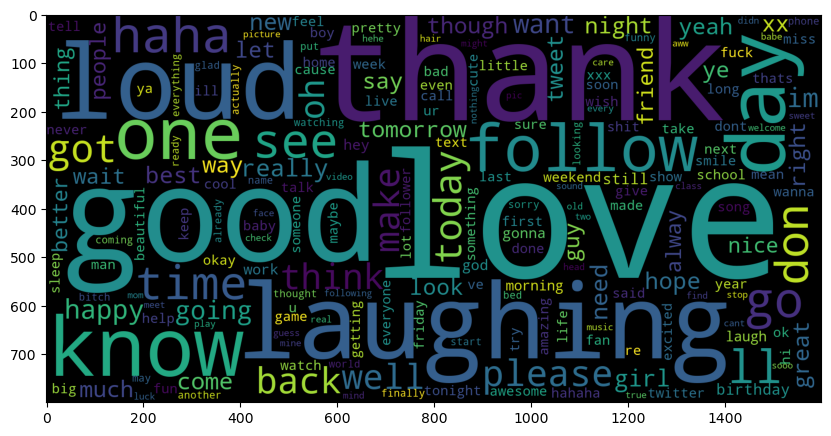

In [7]:
data_pos = df[df['label'] == 1]['tweet']
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 200 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

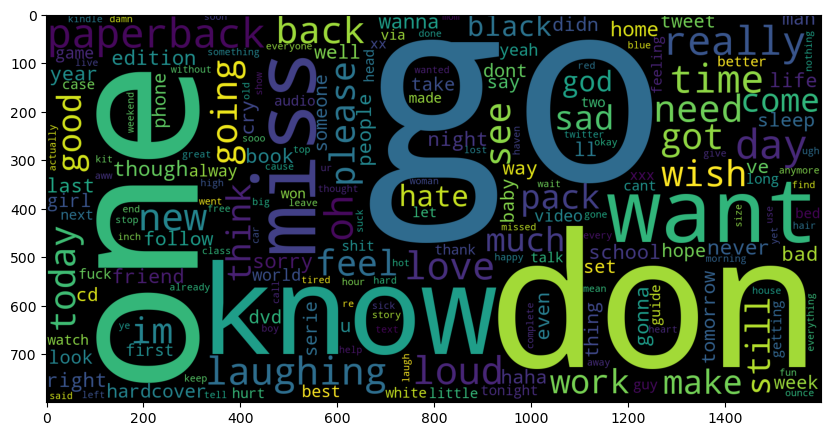

In [8]:
data_neg = df[df['label'] == -1]['tweet']
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 200 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [9]:
del data_neg
del data_pos
gc.collect()

X = df.tweet
y = df.label

# TF-IDF
Vectorization of the dataset using TF-IDF transformation

In [10]:
vectoriser = TfidfVectorizer(ngram_range=(1,3)) #Tokenized here
vectoriser.fit(X)
X = vectoriser.transform(X)

In [11]:
print("Dataset shape: ", X.shape)

Dataset shape:  (2077501, 15120120)


# Bernoulli naive bayes

In [12]:
from sklearn.naive_bayes import BernoulliNB
s_split=ShuffleSplit(n_splits=5,test_size=0.1)

BNB = BernoulliNB()
bnb_score=cross_val_score(BNB,X,y,cv=s_split)

In [13]:
print(f'BNB mean accuracy = {bnb_score.mean():.4f}')
print(f'BNB standard deviation accuracy = {bnb_score.std():.4f}')

BNB mean accuracy = 0.7480
BNB standard deviation accuracy = 0.0008


# Linear SVM

In [14]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
lsvc_score=cross_val_score(LSVC,X,y,cv=s_split)

In [15]:
print(f'SVM mean accuracy = {lsvc_score.mean():.4f}')
print(f'SVM standard deviation accuracy = {lsvc_score.std():.4f}')

SVM mean accuracy = 0.8184
SVM standard deviation accuracy = 0.0005


# Multinomial NB

In [16]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB_score=cross_val_score(MNB,X,y,cv=s_split)

In [17]:
print(f'MNB mean accuracy = {MNB_score.mean():.4f}')
print(f'MNB standard deviation accuracy = {MNB_score.std():.4f}')

MNB mean accuracy = 0.7962
MNB standard deviation accuracy = 0.0006
